## Visualization of all training runs

In [1]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

2024-06-28 17:46:51.530724: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_3_spider_*/**/*reward_sum*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_3_spider_*/', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_3_spider_*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_3*', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if not "eudist" in file and not "spread_training" in file and not "meeting" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files

['training/spiderenv_training/seqdqn_3_spider_important/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_spider_important/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqdqn_3_spider_important/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_9/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_spider_9/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqdqn_3_spider_9/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_lowlr2/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_sp

In [3]:
# readers = [SummaryReader(file, pivot = True) for file in tb_files]

In [4]:
# log_paths = [reader.log_path for reader in readers]
# display(log_paths)

In [5]:
# reader = SummaryReader(tb_files, pivot = True, extra_columns = {'dir_name'})
# reader = SummaryReader(".", pivot = True, extra_columns = {'dir_name'})
# df = reader.scalars
# df

# pd.set_option('display.max_rows', 500)
dfs = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "sac_3_spider" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/spiderenv_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/spiderenv_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<20000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
        temp_df = temp_df[temp_df.step > 10]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        dfs.append(temp_df)
        print("succes")
    else:
        print("reward logs not found")
print("all success")

training/spiderenv_training/seqdqn_3_spider_important/tensorboard_logs/rollout_reward_sum_agent2
seqdqn_3_spider_important
succes
training/spiderenv_training/seqdqn_3_spider_important/tensorboard_logs/rollout_reward_sum_agent0
seqdqn_3_spider_important
succes
training/spiderenv_training/seqdqn_3_spider_important/tensorboard_logs/rollout_reward_sum_agent1
seqdqn_3_spider_important
succes
training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent2
seqsac_3_spider
succes
training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0
seqsac_3_spider
succes
training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1
seqsac_3_spider
succes
training/spiderenv_training/seqdqn_3_spider_9/tensorboard_logs/rollout_reward_sum_agent2
seqdqn_3_spider
succes
training/spiderenv_training/seqdqn_3_spider_9/tensorboard_logs/rollout_reward_sum_agent0
seqdqn_3_spider
succes
training/spiderenv_training/seqdqn_3_spider_9/tens

In [6]:
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
dfs

,step,rollout/reward_sum,dir_name,avg_reward_sum
26,26,-0.090000,seqdqn_3_spider_important,0.367800
51,51,-0.078000,seqdqn_3_spider_important,0.451800
76,76,0.947000,seqdqn_3_spider_important,0.380840
101,101,0.949000,seqdqn_3_spider_important,0.344080
126,126,-0.074000,seqdqn_3_spider_important,0.587600
...,...,...,...,...
19876,19876,31.982000,sac_3_spider_big,29.335573
19901,19901,32.974998,sac_3_spider_big,29.939213
19926,19926,32.977665,sac_3_spider_big,30.294667
19951,19951,31.978666,sac_3_spider_big,31.856600


In [7]:
display(df["dir_name"].unique())

array(['seqdqn_3_spider_important', 'seqsac_3_spider', 'seqdqn_3_spider',
       'seqdqn_3_spider_lowlr', 'seqdqn_3_spider_importantt',
       'seqdqn_3_spider_3_small', 'seqdqn_3_spider_testtt',
       'seqdqn_3_spider_testt', 'seqdqn_3_spider_test',
       'seqdqn_3_spider_3_big', 'dqn_3_spider_lowlr2/', 'dqn_3_spider_7/',
       'dqn_3_spider_2/', 'dqn_3_spider_highlr/', 'dqn_3_spider_3/',
       'dqn_3_spider_highlr2/', 'dqn_3_spider_big/', 'dqn_3_spider_1/',
       'dqn_3_spider_8/', 'dqn_3_spider_lowlr/', 'dqn_3_spider_small/',
       'dqn_3_spider_6/', 'dqn_3_spider_9/', 'seqsac_3_spider_highlr',
       'seqsac_3_spider_big', 'seqsac_3_spider_lowlr',
       'seqsac_3_spider_small', 'sac_3_spider_small',
       'sac_3_spider_highlr', 'sac_3_spider', 'sac_3_spider_big',
       'sac_3_spider_lowlr'], dtype=object)

In [8]:
# df2 = df.loc[(df.index>0)&(df.index<20000)]
df2 = df

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

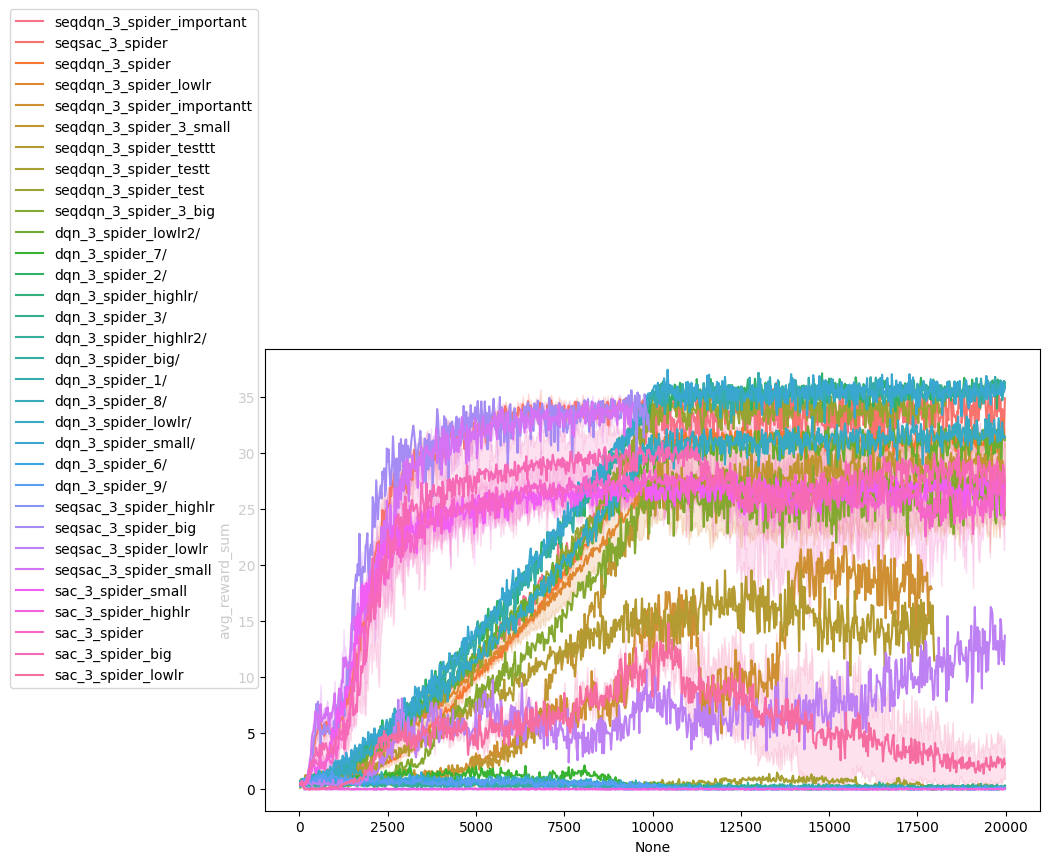

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data = df2, x = df2.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

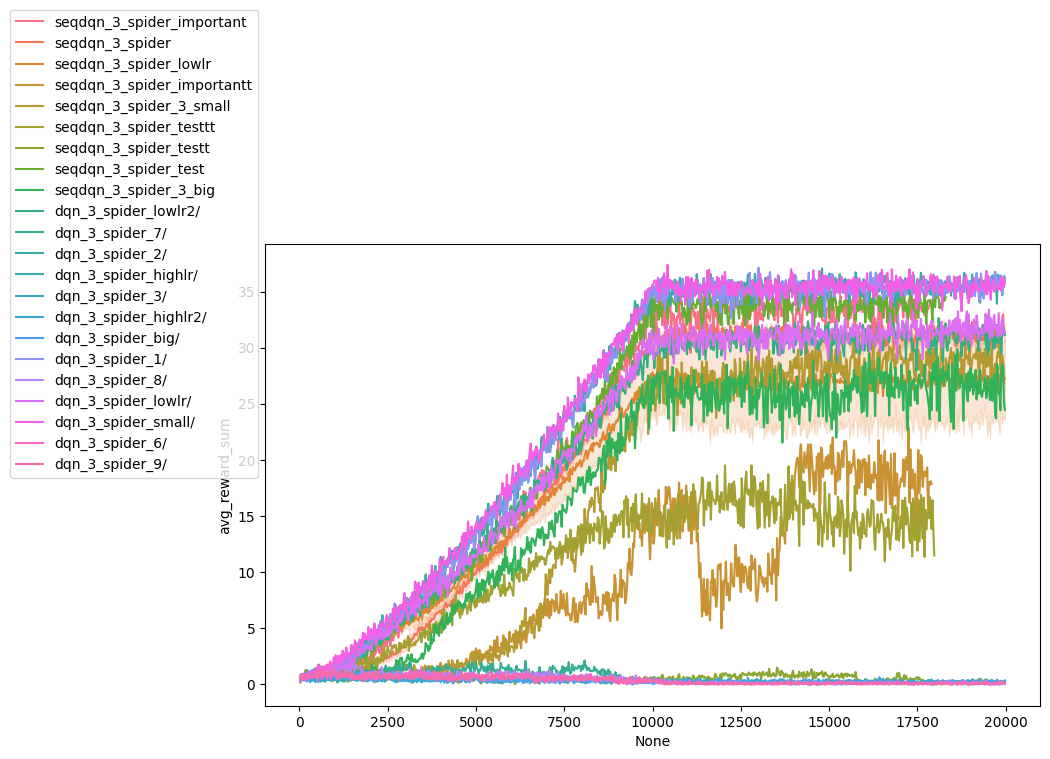

In [10]:
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("dqn")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

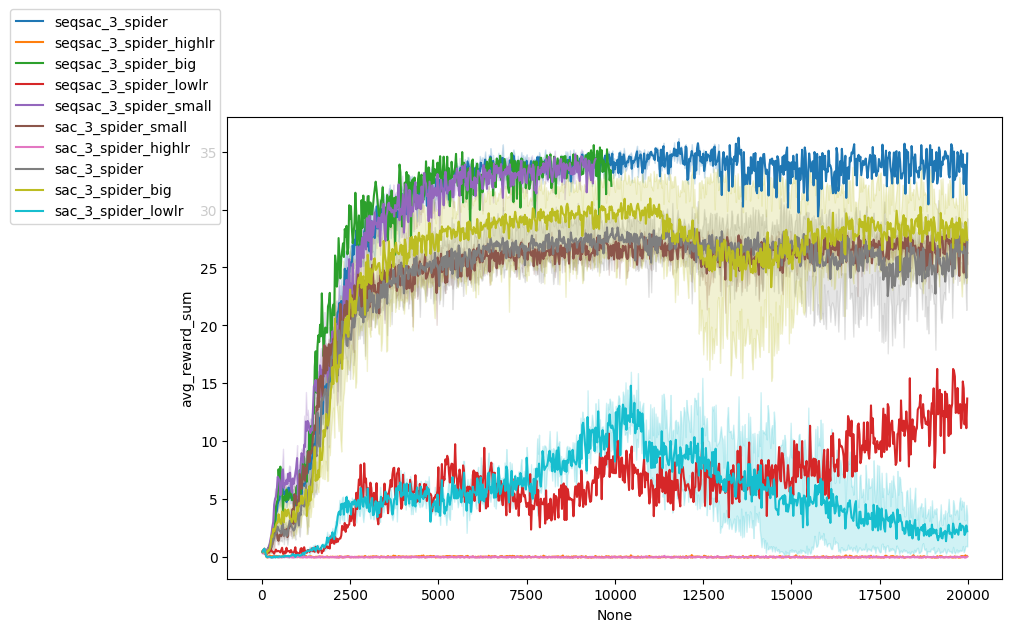

In [11]:
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("sac")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

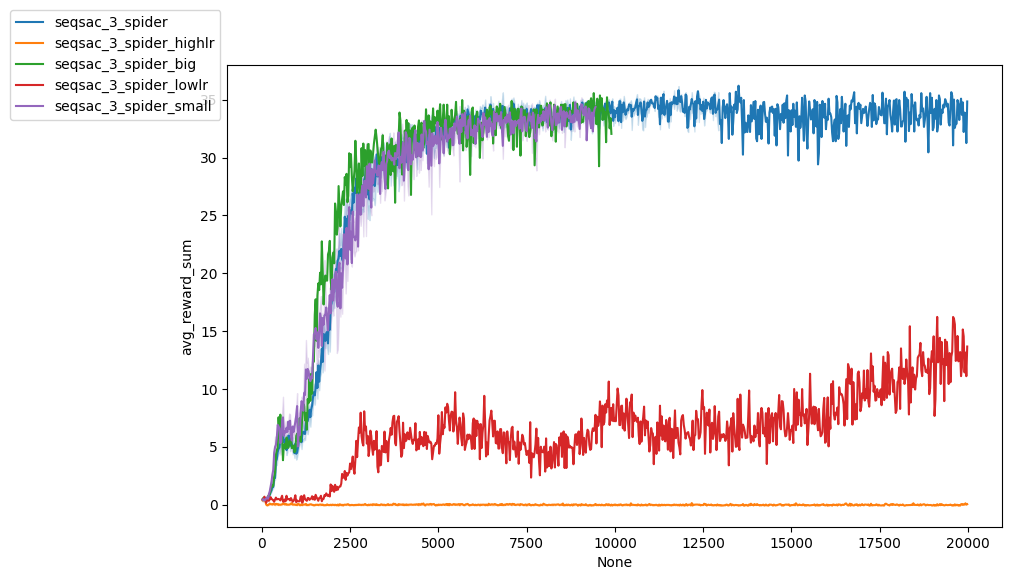

In [12]:
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("seqsac")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

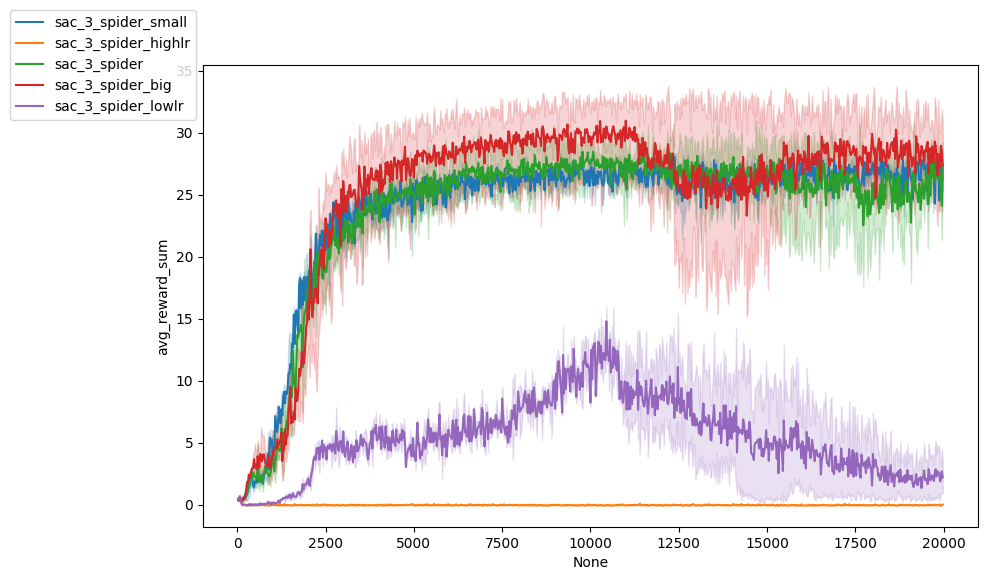

In [13]:
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.startswith("sac")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

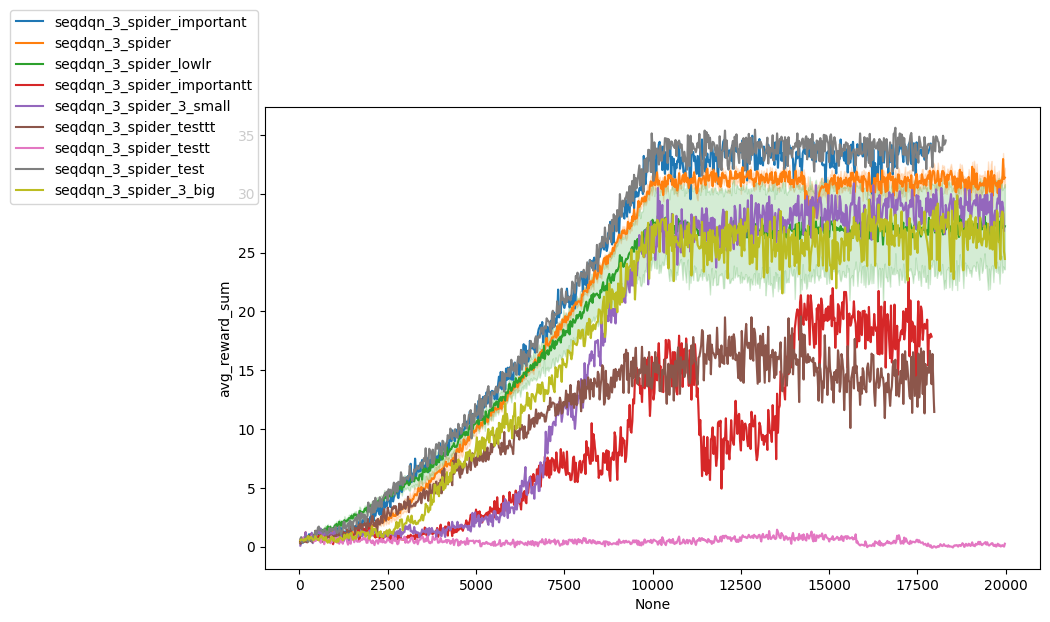

In [14]:
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("seqdqn")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

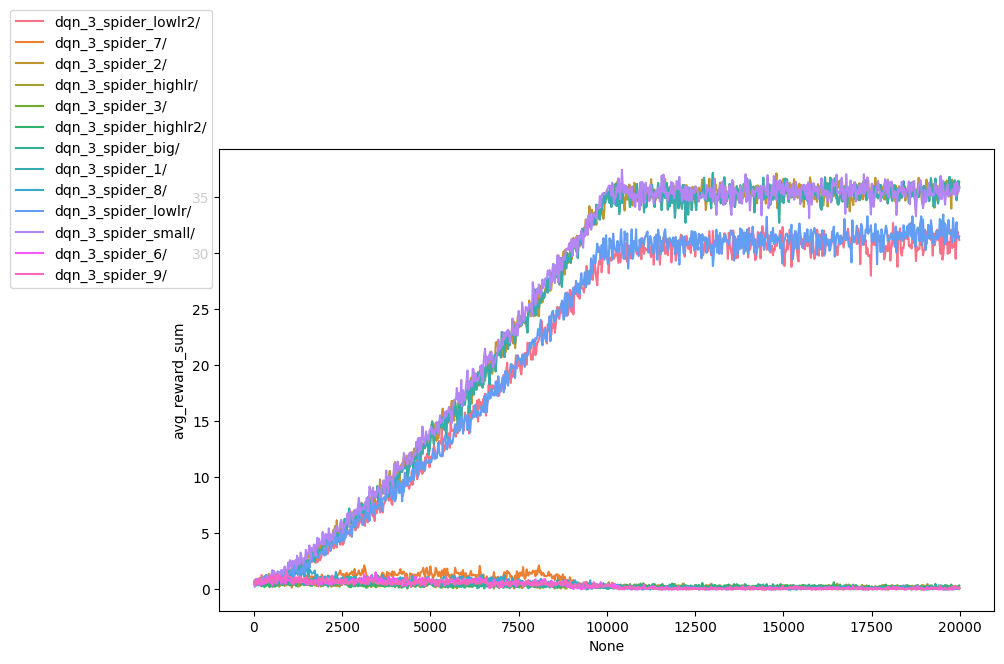

In [15]:
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.startswith("dqn")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

In [1]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

2024-09-06 16:48:17.018763: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqsac_*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/ssac_*', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "custom_spread_training" in file and not "custom_agents" in file and not "meeting" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files

['training/custom_spread_training/seqsac_2_2',
 'training/custom_spread_training/seqsac_4_1',
 'training/custom_spread_training/seqsac_3_1',
 'training/custom_spread_training/seqsac_2_3',
 'training/custom_spread_training/seqsac_2_1',
 'training/custom_spread_training/seqsac_3_highlr',
 'training/custom_spread_training/seqsac_3_highlr2',
 'training/custom_spread_training/seqsac_2_4',
 'training/custom_spread_training/seqsac_3_lowlr',
 'training/custom_spread_training/seqsac_3_2',
 'training/custom_spread_training/ssac_3_lowlr',
 'training/custom_spread_training/ssac_2_4',
 'training/custom_spread_training/ssac_3_highlr2',
 'training/custom_spread_training/ssac_2_2',
 'training/custom_spread_training/ssac_2_1',
 'training/custom_spread_training/ssac_4_lowlr',
 'training/custom_spread_training/ssac_4_highlr',
 'training/custom_spread_training/ssac_2_3',
 'training/custom_spread_training/ssac_3_1',
 'training/custom_spread_training/ssac_4_1',
 'training/custom_spread_training/ssac_3_highl

In [19]:
# reader = SummaryReader(tb_files, pivot = True, extra_columns = {'dir_name'})
# reader = SummaryReader(".", pivot = True, extra_columns = {'dir_name'})
# df = reader.scalars
# df

# pd.set_option('display.max_rows', 500)
dfs = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "ssac_" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/custom_spread_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/custom_spread_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        # temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<20000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 10, step = 10).mean()
        # temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"]
        temp_df = temp_df[temp_df.step > 50]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        dfs.append(temp_df)
        print("succes")
    else:
        print("no reward logs found")
print("all success")

training/custom_spread_training/seqsac_2_2
seqsac_2
succes
training/custom_spread_training/seqsac_4_1
seqsac_4
succes
training/custom_spread_training/seqsac_3_1
seqsac_3
succes
training/custom_spread_training/seqsac_2_3
seqsac_2
succes
training/custom_spread_training/seqsac_2_1
seqsac_2
succes
training/custom_spread_training/seqsac_3_highlr
seqsac_3_highlr
succes
training/custom_spread_training/seqsac_3_highlr2
seqsac_3_highlr
succes
training/custom_spread_training/seqsac_2_4
seqsac_2
succes
training/custom_spread_training/seqsac_3_lowlr
seqsac_3_lowlr
succes
training/custom_spread_training/seqsac_3_2
seqsac_3
succes
training/custom_spread_training/ssac_3_lowlr
ssac_3_lowlr
succes
training/custom_spread_training/ssac_2_4
ssac_2
succes
training/custom_spread_training/ssac_3_highlr2
ssac_3_highlr
succes
training/custom_spread_training/ssac_2_2
ssac_2
succes
training/custom_spread_training/ssac_2_1
ssac_2
succes
training/custom_spread_training/ssac_4_lowlr
ssac_4_lowlr
succes
training/cus

In [20]:
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]

In [21]:
display(df["dir_name"].unique())

array(['seqsac_2', 'seqsac_4', 'seqsac_3', 'seqsac_3_highlr',
       'seqsac_3_lowlr', 'ssac_3_lowlr', 'ssac_2', 'ssac_3_highlr',
       'ssac_4_lowlr', 'ssac_4_highlr', 'ssac_3', 'ssac_4'], dtype=object)

In [22]:
# df2 = df.loc[(df.index>0)&(df.index<20000)]
df4 = df

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

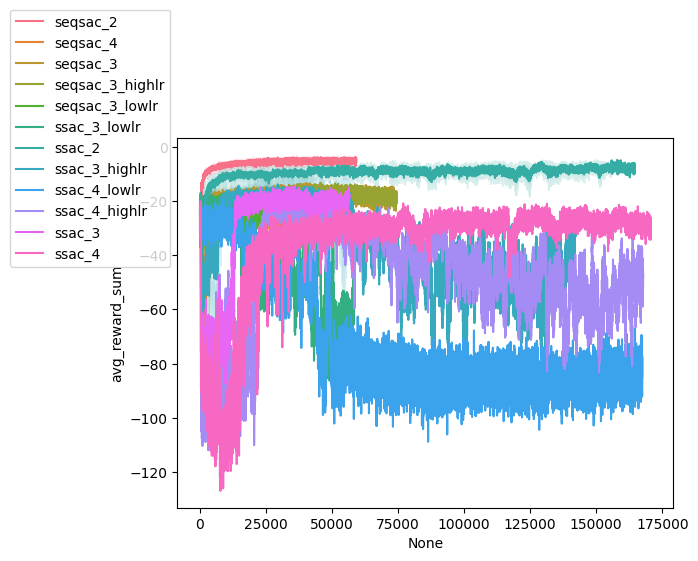

In [23]:
plt.figure()
# df3 = df2[df2["dir_name"].str.contains("/dqns")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df4, x = df4.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

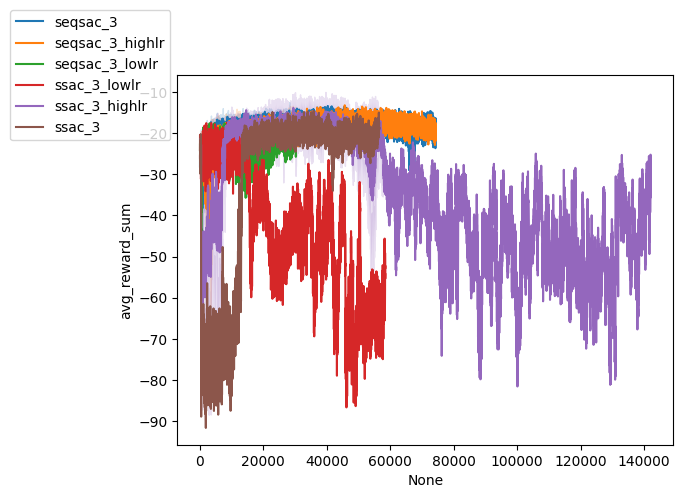

In [24]:
plt.figure()
df5 = df4[df4["dir_name"].str.contains("sac_3")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


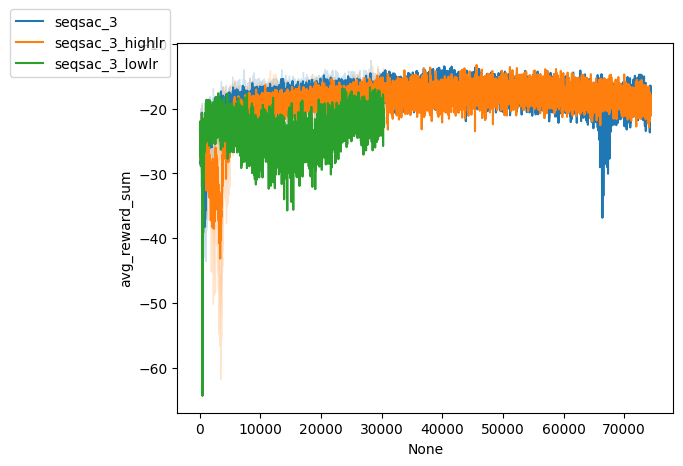

In [25]:
plt.figure()
df5 = df4[df4["dir_name"].str.contains("seqsac_3")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


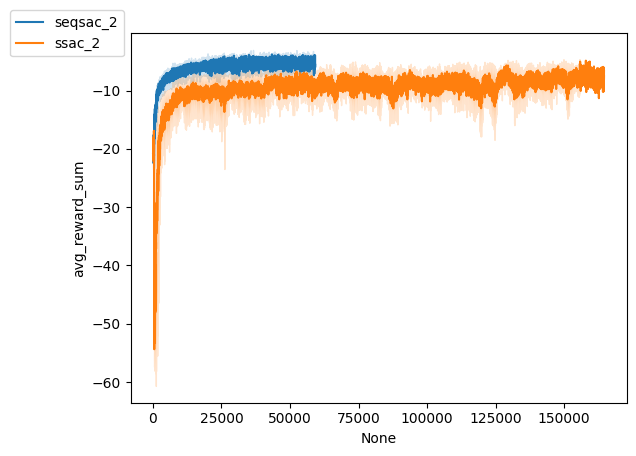

In [26]:
plt.figure()
df5 = df4[df4["dir_name"].str.contains("sac_2")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


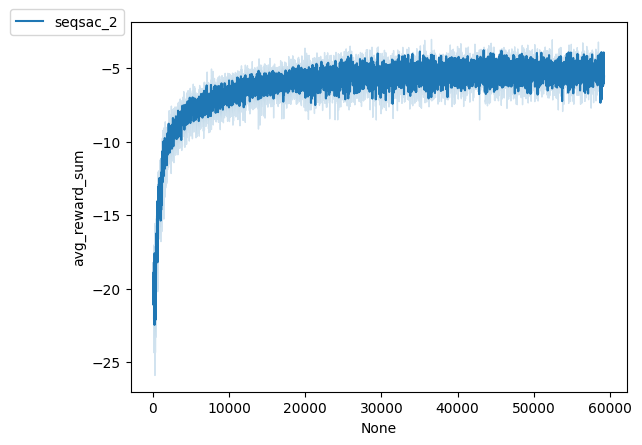

In [27]:
plt.figure()
df5 = df4[df4["dir_name"].str.contains("seqsac_2")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


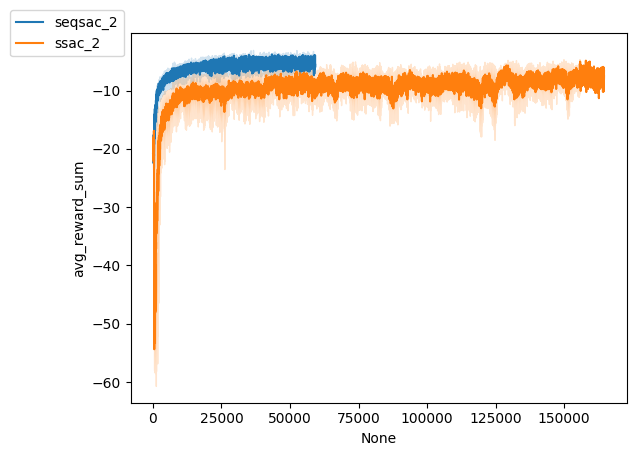

In [28]:
plt.figure()
df5 = df4[df4["dir_name"].str.contains("_2")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

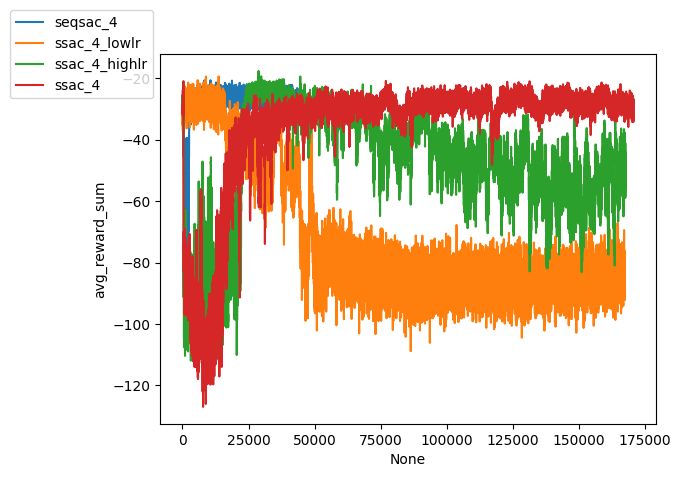

In [29]:
plt.figure()
df5 = df4[df4["dir_name"].str.contains("_4")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

In [30]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

In [31]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqsac_*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_*', recursive = True):
    tb_files.append(filename)
    
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "custom_spread_training" in file and not "custom_agents" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files
# reader = SummaryReader(tb_files, pivot = True, extra_columns = {'dir_name'})
# reader = SummaryReader(".", pivot = True, extra_columns = {'dir_name'})
# df = reader.scalars
# df

['training/custom_spread_training/seqsac_2_2',
 'training/custom_spread_training/seqsac_4_1',
 'training/custom_spread_training/seqsac_3_1',
 'training/custom_spread_training/seqsac_2_3',
 'training/custom_spread_training/seqsac_2_1',
 'training/custom_spread_training/seqsac_3_highlr',
 'training/custom_spread_training/seqsac_3_highlr2',
 'training/custom_spread_training/seqsac_2_4',
 'training/custom_spread_training/seqsac_3_lowlr',
 'training/custom_spread_training/seqsac_3_2']

In [32]:


# pd.set_option('display.max_rows', 500)
dfs = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "/sac_" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/custom_spread_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/custom_spread_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        # temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<20000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 50, step = 50).mean()
        # temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"]
        temp_df = temp_df[temp_df.step > 50]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        dfs.append(temp_df)
        print("succes")
    else:
        print("no reward logs found")
print("all success")

df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
# df2 = df.loc[(df.index>0)&(df.index<20000)]

training/custom_spread_training/seqsac_2_2
seqsac_2
succes
training/custom_spread_training/seqsac_4_1
seqsac_4


KeyboardInterrupt: 

In [32]:
display(df["dir_name"].unique())

array(['seqsac_2', 'seqsac_4', 'seqsac_3', 'seqsac_3_highlr',
       'seqsac_3_lowlr', 'sac_3_lowlr', 'sac_3_highlr', 'sac_4_lowlr',
       'sac_2', 'sac_4_highlr', 'sac_4', 'sac_3'], dtype=object)

In [33]:
df5 = df

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

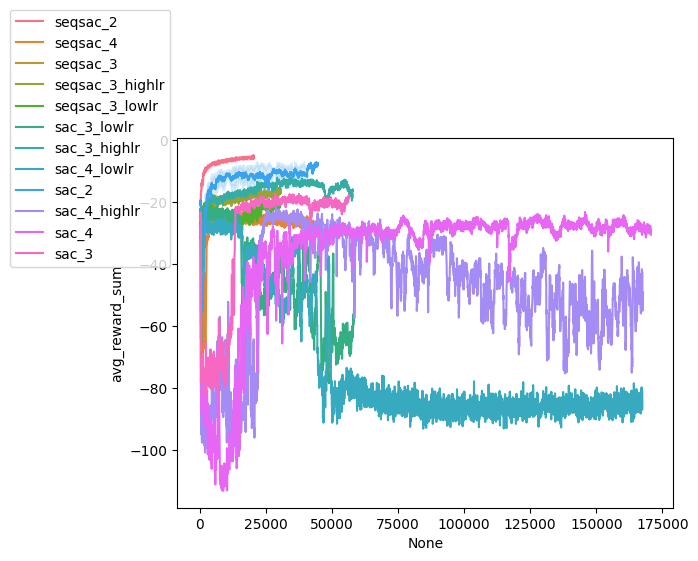

In [34]:

plt.figure()
# df3 = df2[df2["dir_name"].str.contains("/dqns")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

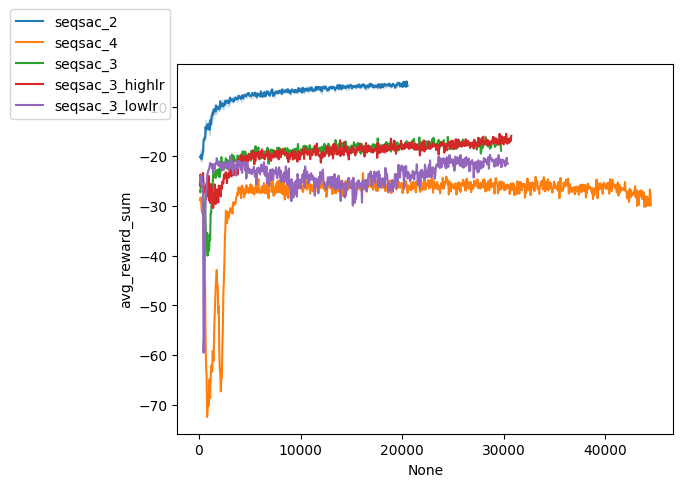

In [35]:

plt.figure()
df = df5[df5["dir_name"].str.startswith("seqsac")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

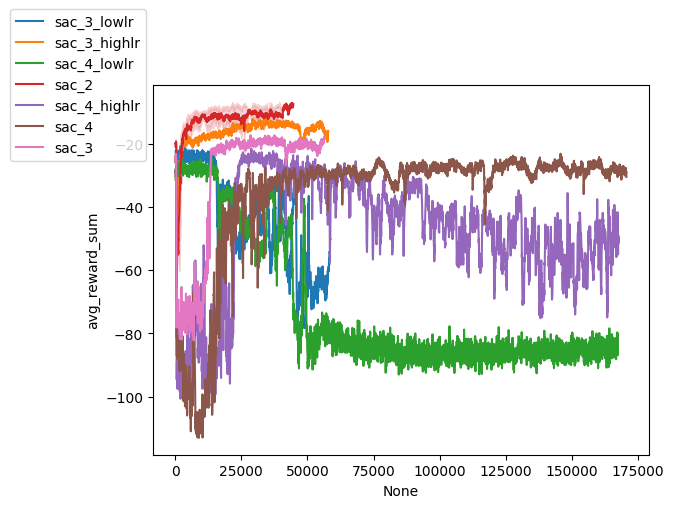

In [36]:

plt.figure()
df = df5[df5["dir_name"].str.startswith("sac")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


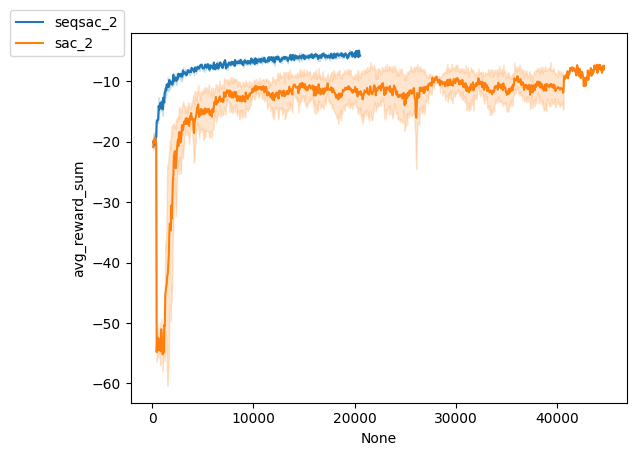

In [37]:

plt.figure()
df = df5[df5["dir_name"].str.contains("sac_2")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


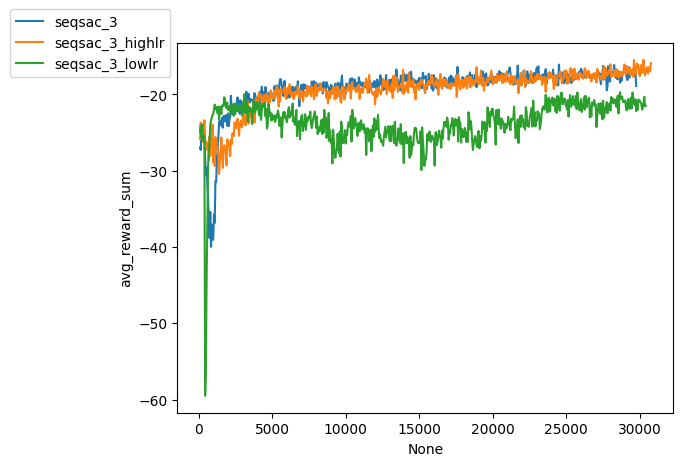

In [38]:

plt.figure()
df = df5[df5["dir_name"].str.contains("seqsac_3")]
# df = pd.concat([df[df["dir_name"].str.endswith("_3_highlr")]])
# df = pd.concat([df[df["dir_name"].str.endswith("_3_highlr")], df[df["dir_name"].str.endswith("_3")]])

# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

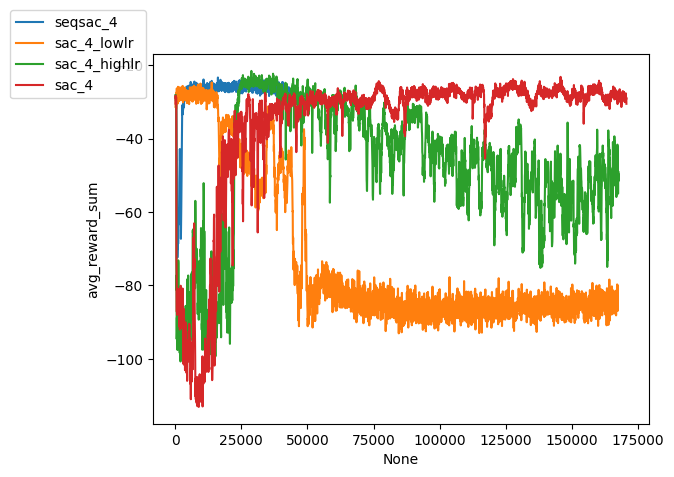

In [39]:

plt.figure()
df = df5[df5["dir_name"].str.contains("sac_4")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)